<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/RetailCompanyCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Walmart Case Study:**
--By Naman Garg


---


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States.

Walmart has more than 100 million customers worldwide.

The dataset has data of customers who transacted on Black Friday.

[https://en.wikipedia.org/wiki/Walmart](https://)

[https://www.walmart.com/](https://)


In [ ]:
#Importing Libraries Required For Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mt

In [ ]:
#Importing Dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [ ]:
#Checking for null values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**Data Exploration Insight:**

1.No duplicate rows.

2.No null values

In [ ]:
#Doing Necessary Modifications in the dataset
df['Gender']=df['Gender'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')
df['Product_Category']=df['Product_Category'].astype('category')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.describe()

,User_ID,Occupation,Purchase
count,5.500680e+05,550068.000000,550068.000000
mean,1.003029e+06,8.076707,9263.968713
std,1.727592e+03,6.522660,5023.065394
min,1.000001e+06,0.000000,12.000000
25%,1.001516e+06,2.000000,5823.000000
50%,1.003077e+06,7.000000,8047.000000
75%,1.004478e+06,14.000000,12054.000000
max,1.006040e+06,20.000000,23961.000000


In [ ]:
df.describe(include=['object','category'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2,20
top,P00265242,M,26-35,B,1,0,5
freq,1880,414259,219587,231173,193821,324731,150933


**Q1. Confidence intervals and distribution of the mean of the expenses by female and male customers.**

In [ ]:
#Taking Male and Female data separately
df_m=df[df['Gender']=='M']
df_f=df[df['Gender']=='F']

In [ ]:
#Calculating Male Population Purchase amount Mean and Standard Deviation
m_avg = df_m['Purchase'].mean()
m_std = np.std(df_m['Purchase'])

print('Mean of Purchase amount of Male: ',m_avg)

Mean of Purchase amount of Male:  9437.526040472265


In [ ]:
#Calculating Female Population  Purchase amount Mean and Standard Deviation
f_avg = df_f['Purchase'].mean()
f_std = np.std(df_f['Purchase'])

print('Mean of Purchase amount of Female: ',f_avg)

Mean of Purchase amount of Female:  8734.565765155476


In [ ]:
def calculate_ci(data,col_name,target_col,confidence,samp_size):
  #Taking Sample of data
  means = []
  #Storing all unique values of column in dictionary
  dict_ci={}
  unique_values=df[col_name].unique()
  #loop for iterating through unique values
  for i in unique_values:
    sdata=data[data[col_name]==i][target_col]
    #loop for taking sample as per CLT theorem
    for j in range(100):
      sample = np.random.choice(sdata,size=samp_size,replace=False).mean()
      means.append(sample)
    means=np.array(means)
    #Calculating Mean Purchase amount with Confidence Interval
    std_error = means.std()
    rem=(100-confidence)/2
    c1=rem/100
    c2=(100-rem)/100
    x1= st.norm(means.mean(),std_error).ppf(c1)
    x2 = st.norm(means.mean(),std_error).ppf(c2)
    dict_ci[i]=(x1,x2)
    means=[]
  return dict_ci

In [ ]:
#Calculating Mean Purchase amount with 90% Confidence Interval of Gender

ci_gender = calculate_ci(df,'Gender','Purchase',confidence=90,samp_size=100)
ci_gender

{'F': (7941.2453155098465, 9529.065884490154),
 'M': (8705.625968636534, 10269.194431363467)}

**Business Insight 1:**

From above data we concluded that transaction interval amount of male and female group are overlapping so we can't say average male spend more or less as compared to a female.
But if we only look at the population mean then we can say that average men spend more than women.

**Q2. Confidence intervals and distribution of the mean of the expenses by married and unmarried customers.**



In [ ]:
#Taking Married and Unmarried Data Seprately
married = df[df['Marital_Status']==1]
unmarried = df[df['Marital_Status']==0]

In [ ]:
#Calculating Married Population Purchase amount Mean and Standard Deviation
mar_avg = married['Purchase'].mean()
mar_std = np.std(married['Purchase'])

print('Mean of Purchase amount of Married: ',mar_avg)

Mean of Purchase amount of Married:  9261.174574082374


In [ ]:
#Calculating Unmarried Population Purchase amount Mean and Standard Deviation
unmar_avg = unmarried['Purchase'].mean()
unmar_std = np.std(unmarried['Purchase'])

print('Mean of Purchase amount of Unmarried: ',unmar_avg)

Mean of Purchase amount of Unmarried:  9265.907618921507


In [ ]:
#Calculating Mean Purchase amount with 90% Confidence Interval of Marital Status

ci_marital_status = calculate_ci(df,'Marital_Status','Purchase',confidence=90,samp_size=100)
ci_marital_status

{0: (8381.608385495208, 10004.425814504793),
 1: (8407.07020439367, 10124.398395606328)}

**Business Insight 2:**

From above data we concluded that transaction interval amount of married and unmarried group are same so we can say that married person spend almost same amount as unmarried person which is also true if we look at the population mean.

**Q3. Confidence intervals and distribution of the mean of the expenses by Age.**



In [ ]:
#Calculating Mean Purchase amount with 90% Confidence Interval of Age using above function

ci_age = calculate_ci(df,'Age','Purchase',confidence=90,samp_size=100)
ci_age

{'0-17': (8031.831237940906, 9806.749362059094),
 '55+': (8540.75936531432, 10157.49723468568),
 '26-35': (8398.102622496988, 10070.363377503012),
 '46-50': (8415.110723129057, 9980.23367687094),
 '51-55': (8652.481560008933, 10245.798639991068),
 '36-45': (8655.228222762778, 10169.447777237221),
 '18-25': (8175.359424083451, 10035.18877591655)}

**Business Insight 3:**

From above data we concluded that transaction amount of different age group are overlapping so we can't conclude that some age group spend more or less.

**Q4.Calculate number of unique users in each age group**

In [ ]:
age_count=df.groupby('Age').aggregate({'User_ID':'nunique'}).sort_values(by='Age').reset_index()
age_count.rename(columns={'User_ID':'count'},inplace=True)
age_count

,Age,count
0,0-17,218
1,18-25,1069
2,26-35,2053
3,36-45,1167
4,46-50,531
5,51-55,481
6,55+,372


<Axes: xlabel='Age', ylabel='count'>

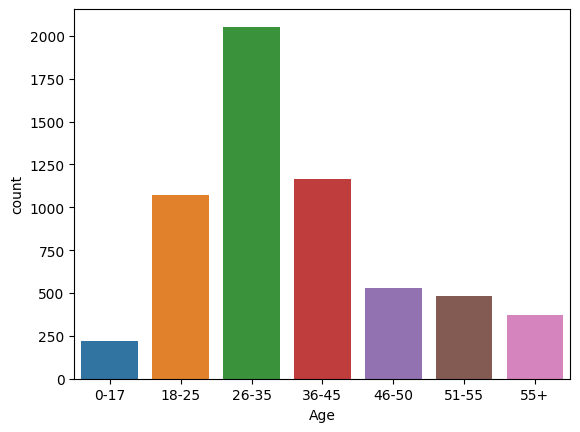

In [ ]:
sns.barplot(data=age_count,x='Age',y='count')

**Q5. Calculate number of transactions done by each age group.**

In [ ]:
age_transact_count=df['Age'].value_counts().reset_index()
age_transact_count.rename(columns={'index':'Age','Age':'count'},inplace=True)
age_transact_count

,Age,count
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


**Q6. Calculte mean purchase amount by each age group.**

In [ ]:
mean_purchase=df.groupby('Age')['Purchase'].mean().reset_index()
mean_purchase

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


<Axes: xlabel='Age', ylabel='Purchase'>

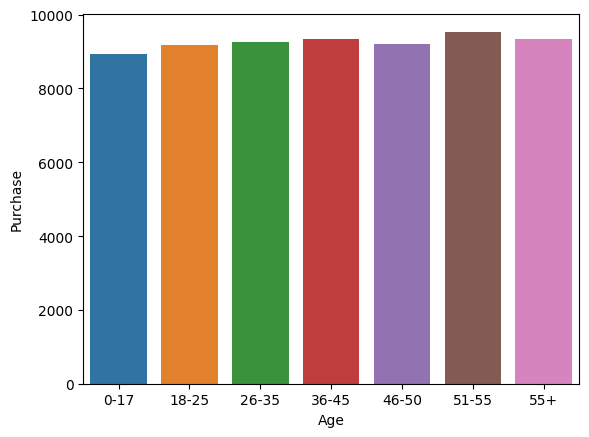

In [ ]:
sns.barplot(data=mean_purchase,x='Age',y='Purchase')

**Business Insight 4:**

From above data we concluded:

1.We have very high no of customers from age group 26-35
and have high no of transactions

2.The Average spend on transaction is almost same irresepective in all age groups

**Q7.Find product Categories with high mean purchase amount.**

In [ ]:
topcat=df.groupby('Product_Category')['Purchase'].mean().sort_values(ascending=False).reset_index()
topcat

,Product_Category,Purchase
0,10,19675.570927
1,7,16365.689600
2,6,15838.478550
3,9,15537.375610
4,15,14780.451828
5,16,14766.037037
6,1,13606.218596
7,14,13141.625739
8,2,11251.935384
9,17,10170.759516


<Axes: xlabel='Product_Category', ylabel='Purchase'>

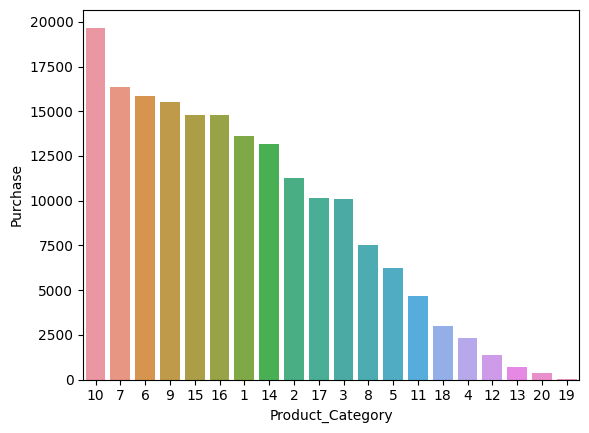

In [ ]:
sns.barplot(data=topcat,x='Product_Category',y='Purchase',order=topcat['Product_Category'])

**Business Insight 5:**

From above data we concluded that:

Average amount spend on product category 10, 7, 6, 9 is high and low on 12, 13, 20, 19.

**Q8.Plot Age,Gender to show their affects on purchase.**

<Axes: xlabel='Age', ylabel='Purchase'>

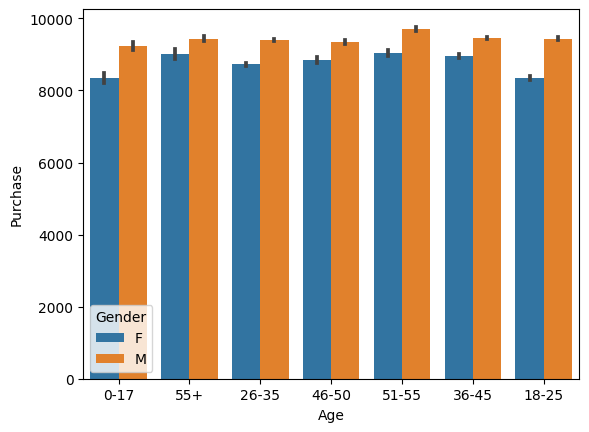

In [ ]:
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender')

**Q9.Plot Age,Marital to show their affects on purchase.**

<Axes: xlabel='Age', ylabel='Purchase'>

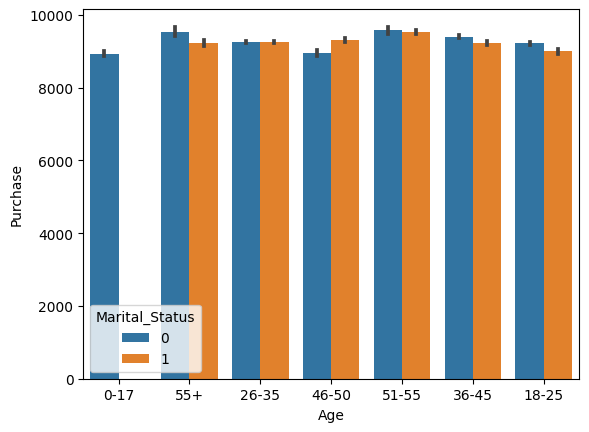

In [ ]:
sns.barplot(data=df,x='Age',y='Purchase',hue='Marital_Status')

**Business Insight 6:**

From above data we concluded that:

Age, Marital Status, Gender has very less affect on average purchase amount

**Q10.Plot Boxplot to show the affects of City and Gender on purchase.**

<Axes: xlabel='City_Category', ylabel='Purchase'>

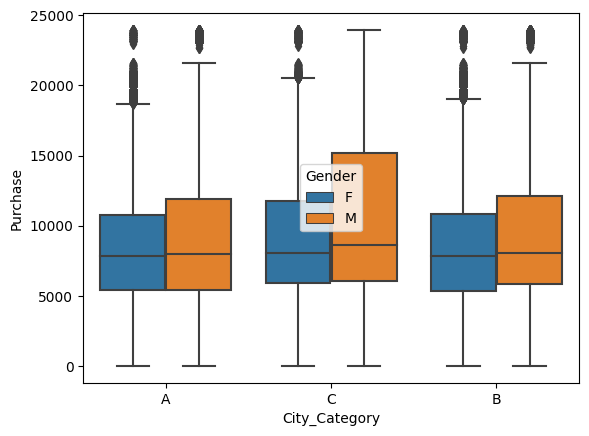

In [ ]:
sns.boxplot(data=df,x='City_Category',y='Purchase',hue='Gender')

**Business Insight 7:**

From above data we concluded that:

Gender, City Category has very less affect on average purchase amount but maximum amount spend is little higher in city with category 'c'.

**Q11.Discover any relation of occupation,stay in current years with purchase amount.**

<Axes: xlabel='Occupation', ylabel='Purchase'>

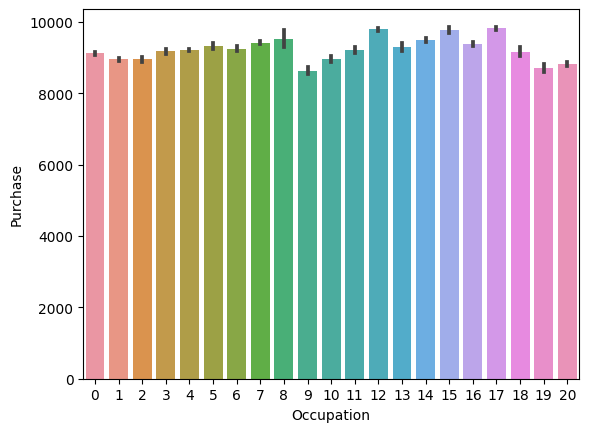

In [ ]:
sns.barplot(data=df,x='Occupation',y='Purchase')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

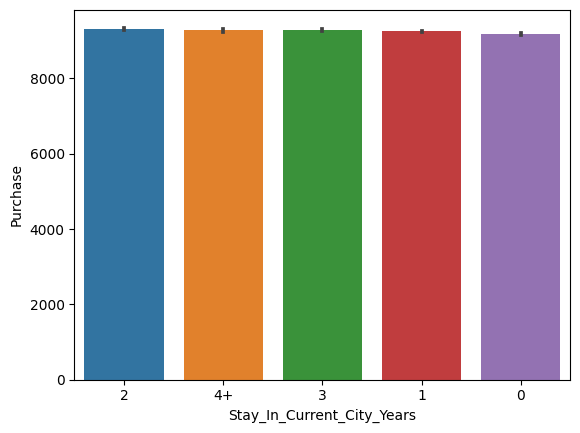

In [ ]:
sns.barplot(data=df,x='Stay_In_Current_City_Years',y='Purchase')

**Business Insight 8:**

From above data we concluded that:

Stay in current city and ocupation has no effect on purchase amount.

# **Business Recommendations**


**Business Recommendation 1:**
- **Gender-Neutral-Marketing:** While there is an overlap in transaction amounts between genders.Create promotions and product recommendations that appeal to both Male and Female Customers

**Business Recommendation 2:**
- **Marital Status-Agnostic Campaigns:** Since married and unmarried individuals have similar transaction amounts, it may be beneficial to run campaigns and promotions that do not specifically target marital status. Focus on universal marketing campaigns that resonate with both groups.

**Business Recommendation 3:**
- **Age-Neutral Strategies:** Given the overlapping transaction amounts among age groups, it's advisable to adopt age-neutral marketing and product strategies. Ensure that your offerings cater to a broad age range to maximize market reach.

**Business Recommendation 4:**
- **Leverage the 26-35 Age Group:** As this age group has a high number of customers and transactions, consider developing marketing campaigns and products tailored to their preferences. Engage with them through personalized promotions and loyalty programs.

**Business Recommendation 5:**
- **Product Category Optimization:** Allocate resources to promote and expand product categories 10, 7, 6, and 9, as they have higher average purchase amounts. Conversely, consider reevaluating or repositioning products in categories 12, 13, 20, and 19 to increase their appeal to customers.

**Business Recommendation 6:**
- **Focus on Cross-Demographic Appeal:** Since age, marital status, and gender have minimal effects on average purchase amounts, prioritize products and marketing strategies that resonate across demographic boundaries. Emphasize factors like quality, value, and customer experience.

**Business Recommendation 7:**
- **Enhance Marketing in City Category 'C':** While gender and city category have limited effects on average purchase amounts, the higher maximum spending in city category 'C' suggests potential for increased sales. Consider strengthening marketing efforts and promotions in this category to capture more high-value transactions.
